# Has rain gotten more frequent in Seattle?
## Dan Siegel
https://www.kaggle.com/rtatman/did-it-rain-in-seattle-19482017 
______________

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 

In [44]:
rain = pd.read_csv('seattleWeather_1948-2017.csv')

In [45]:
rain.describe()
rain.head()

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True


In [24]:
#Bad Values within the data set
rain[pd.isnull(rain).any(axis=1)]

,DATE,PRCP,TMAX,TMIN,RAIN
18415,1998-06-02,NaN,72,52,NaN
18416,1998-06-03,NaN,66,51,NaN
21067,2005-09-05,NaN,70,52,NaN


In [46]:
#Cleaning data set
rain.dropna(axis=1, how='all', inplace=True)

# Hypothesis:
Rain has been steadily increasing in Seattle.
Null Hypothesis: Rain has has not increased or changed over time 

## Describe what the 5 variables mean in the dataset (Chapter 1).
DATE: the date of the observation

PRCP: the amount of precipitation, in inches

TMAX: the maximum temperature for that day, in degrees Fahrenheit

TMIN: the minimum temperature for that day, in degrees Fahrenheit

RAIN: TRUE if rain was observed on that day, FALSE if it was not

___
Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2). 

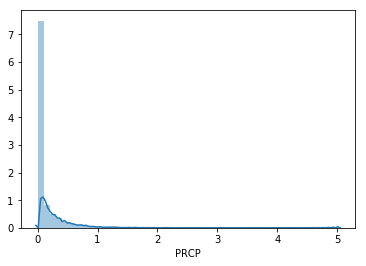

In [72]:
#Skipping date on histogram
sns.distplot(rain['PRCP'].dropna())

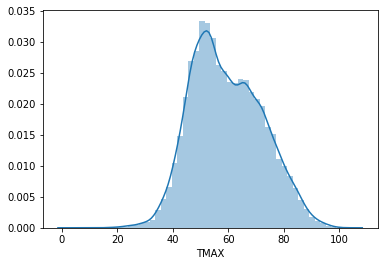

In [73]:
sns.distplot(rain['TMAX'].dropna())

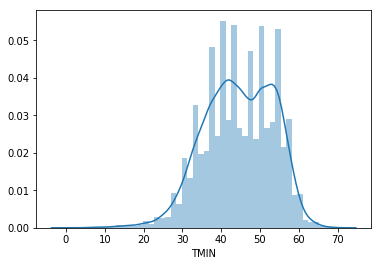

In [74]:
sns.distplot(rain['TMIN'].dropna())

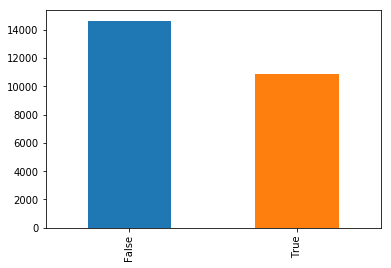

In [89]:
rain['RAIN'].value_counts().plot(kind='bar')

Include the other descriptive characteristics about the variables: 
* Mean
* Mode 
* Spread
* Tails

In [94]:
rain['PRCP'].mean(), rain['PRCP'].median(), rain['PRCP'].mode(), rain['PRCP'].std() 

(0.10622162204477956, 0.0, 0    0.0
 dtype: float64, 0.2390314590314671)

In [95]:
rain['DATE']= pd.to_datetime(rain['DATE'])

In [96]:
rain['YEAR']= rain['DATE'].dt.year

In [97]:
rain.head()

,DATE,PRCP,TMAX,TMIN,RAIN,YEAR
0,1948-01-01,0.47,51,42,True,1948
1,1948-01-02,0.59,45,36,True,1948
2,1948-01-03,0.42,45,35,True,1948
3,1948-01-04,0.31,45,34,True,1948
4,1948-01-05,0.17,45,32,True,1948


Text(0.5,1,'Rain Corr')

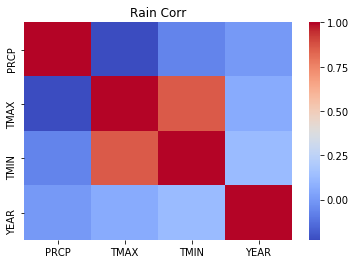

In [98]:
sns.heatmap(rain.corr(), cmap='coolwarm')
plt.title('Rain Corr')

In [99]:
rain_per_year = rain[(rain['RAIN']==True)].groupby('YEAR').count()

In [121]:
year_rain_count=rain[rain['RAIN']==True].groupby('YEAR').count()

In [123]:
rain_per_year['RAIN']=year_rain_count['RAIN']

In [124]:
rain_per_year['TMIN MEAN']=rain.groupby('YEAR')['TMIN'].mean()
rain_per_year['TMAX MEAN']=rain.groupby('YEAR')['TMAX'].mean()
rain_per_year['PRCP MEAN']=rain.groupby('YEAR')['PRCP'].mean()

In [126]:
rain_per_year.reset_index(inplace=True)

In [127]:
rain_per_year = rain_per_year[['YEAR', 'RAIN', 'TMIN MEAN', 'TMAX MEAN', 'PRCP MEAN']]

In [129]:
rain_per_year.head()

,YEAR,RAIN,TMIN MEAN,TMAX MEAN,PRCP MEAN
0,1948,177,41.196721,57.013661,0.125109
1,1949,139,41.391781,59.147945,0.088932
2,1950,194,41.000000,57.035616,0.151068
3,1951,150,41.052055,58.545205,0.110411
4,1952,139,41.467213,58.743169,0.064973


In [ ]:
rain_per_year.columns

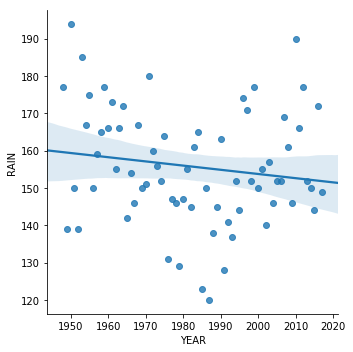

In [130]:
sns.lmplot(x='YEAR', y='RAIN', data=rain_per_year)

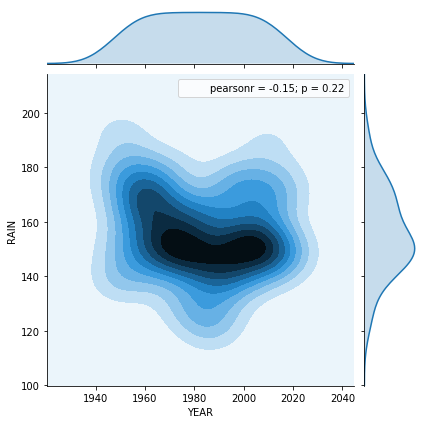

In [164]:
sns.jointplot(x='YEAR', y='RAIN', data=rain_per_year, kind='kde')

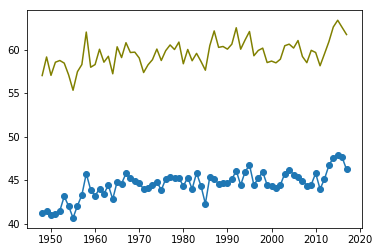

In [132]:
plt.plot('YEAR', 'TMIN MEAN', data=rain_per_year, marker='o')
plt.plot('YEAR', 'TMAX MEAN', data=rain_per_year, marker='', color='olive')

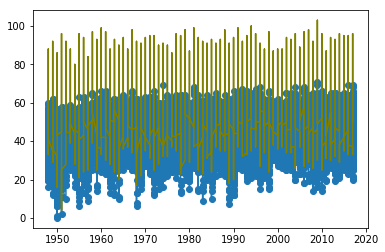

In [133]:
plt.plot('YEAR', 'TMIN', data=rain, marker='o')
plt.plot('YEAR', 'TMAX', data=rain, marker='', color='olive')

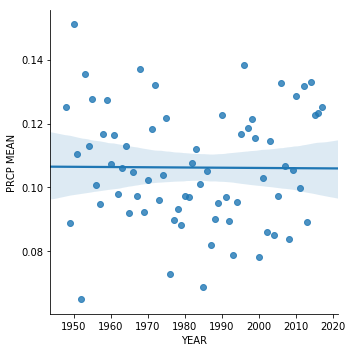

In [153]:
sns.lmplot('YEAR', 'PRCP MEAN', data=rain_per_year)

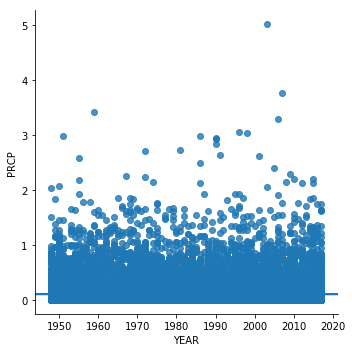

In [152]:
sns.lmplot('YEAR', 'PRCP', data=rain)

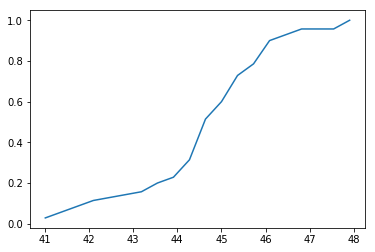

In [159]:
num_bins = 20
counts, bin_edges = np.histogram (rain_per_year['TMIN MEAN'], bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1])

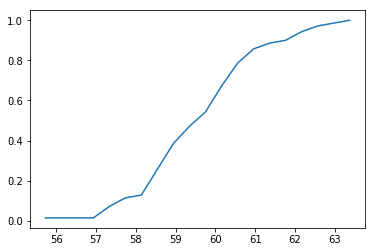

In [160]:
num_bins = 20
counts, bin_edges = np.histogram (rain_per_year['TMAX MEAN'], bins=num_bins, normed=True)
cdf = np.cumsum (counts)
plt.plot (bin_edges[1:], cdf/cdf[-1])

In [181]:
super_column = rain_per_year[['YEAR', 'TMIN MEAN', 'TMAX MEAN']]

In [182]:
super_column['Max']='Max'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [183]:
super_column['Min']='Min'

In [184]:
max = super_column[['YEAR', 'TMAX MEAN', 'Max']]
min = super_column[['YEAR', 'TMIN MEAN', 'Min']]

In [185]:
max['temp']=max['TMAX MEAN']
max['type']=max['Max']
min['temp']=min['TMIN MEAN']
min['type']=min['Min']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [190]:
max = max[['YEAR', 'temp', 'type']]
min = min[['YEAR', 'temp', 'type']]

In [201]:
combined = max.append(min)

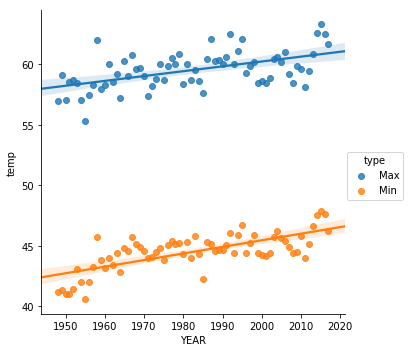

In [203]:
sns.lmplot(x='YEAR', y='temp', hue='type', data=combined)

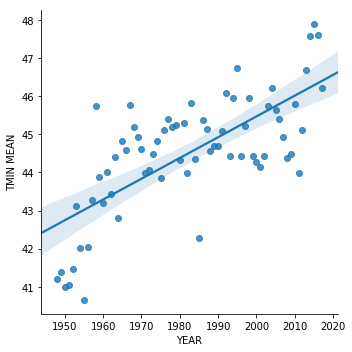

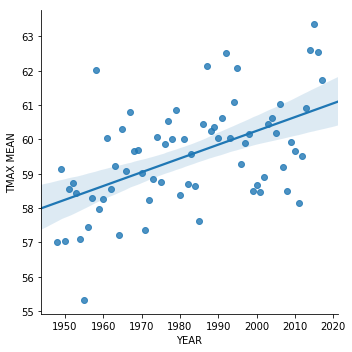

In [204]:
sns.lmplot(x='YEAR', y='TMIN MEAN', data=rain_per_year)
sns.lmplot(x='YEAR', y='TMAX MEAN', data=rain_per_year)

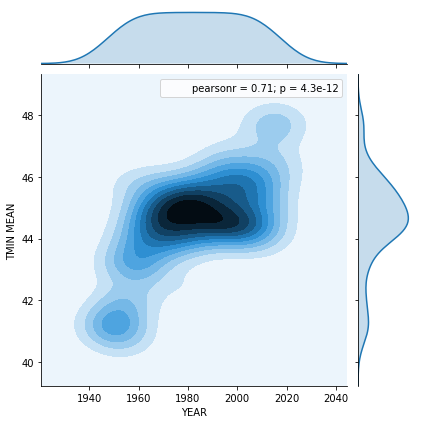

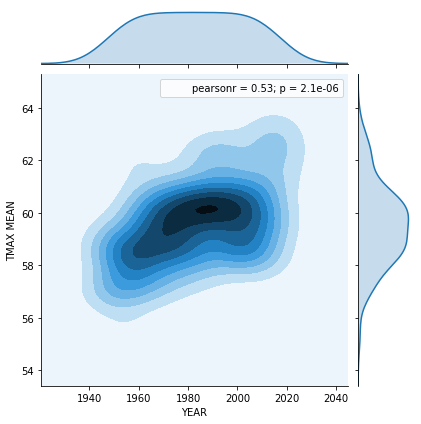

In [162]:
sns.jointplot(x='YEAR', y='TMIN MEAN', data=rain_per_year, kind='kde')
sns.jointplot(x='YEAR', y='TMAX MEAN', data=rain_per_year, kind='kde')